In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsQuartEagle = coins[coins['Denom'] == 'QuartEagle']
coinsQuartEagle = coinsQuartEagle[['Year', 'Mint_State', 'Value']]

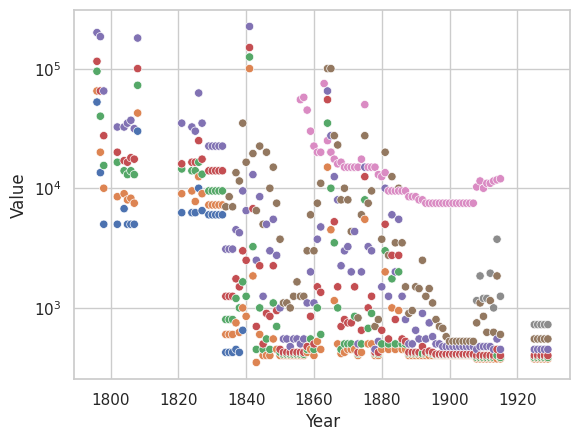

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsQuartEagle, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsQuartEagle)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year     Mint_State     Value
7920  1796           Fine   52500.0
7921  1796          VFine   65000.0
7922  1796          EFine   95000.0
7923  1796  AUncirculated  115000.0
7924  1796    MintState60  200000.0
7927  1797          EFine   40000.0
7928  1797  AUncirculated   65000.0
7929  1797    MintState60  185000.0
7933  1798  AUncirculated   27500.0
7934  1798    MintState60   65000.0
7939  1802    MintState60   32500.0
7944  1804    MintState60   32500.0
7949  1805    MintState60   35000.0
7954  1806    MintState60   37000.0
7959  1807    MintState60   31500.0
7960  1808           Fine   30000.0
7961  1808          VFine   42500.0
7962  1808          EFine   72500.0
7963  1808  AUncirculated  100000.0
7964  1808    MintState60  180000.0
7969  1821    MintState60   35000.0
7974  1824    MintState60   32500.0
7979  1825    MintState60   30000.0
7983  1826  AUncirculated   25000.0
7984  1826    MintState60   62500.0
7989  1827    MintState60   350

In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([7920, 7921, 7922, 7923, 7924, 7927, 7928, 7929, 7933, 7934, 7939,
       7944, 7949, 7954, 7959, 7960, 7961, 7962, 7963, 7964, 7969, 7974,
       7979, 7983, 7984, 7989, 7994, 7999, 8004, 8009, 8014, 8050, 8056,
       8057, 8058, 8059, 8074, 8135, 8141, 8147, 8153, 8159, 8172, 8174,
       8175, 8176, 8177, 8178, 8182, 8183, 8189, 8195, 8243, 8244])

In [32]:
for i in indicies:
  coinsQuartEagle = coinsQuartEagle.drop(i)

In [33]:
coinsQuartEagle

,Year,Mint_State,Value
7925,1797,Fine,13500.0
7926,1797,VFine,20000.0
7930,1798,Fine,5000.0
7931,1798,VFine,10000.0
7932,1798,EFine,15500.0
...,...,...,...
8518,1929,EFine,385.0
8519,1929,AUncirculated,400.0
8520,1929,MintState60,450.0
8521,1929,MintState63,550.0


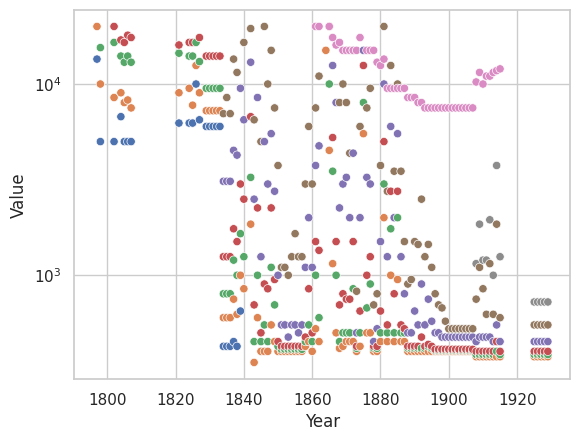

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsQuartEagle, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsQuartEagle["Mint_State"] = lencMS.fit_transform(coinsQuartEagle["Mint_State"])
coinsQuartEagle["Mint_State"]

7925    2
7926    7
7930    2
7931    7
7932    1
       ..
8518    1
8519    0
8520    3
8521    4
8522    5
Name: Mint_State, Length: 549, dtype: int64

In [36]:
coinsQuartEagle['log_Value'] = np.log(coinsQuartEagle['Value'])

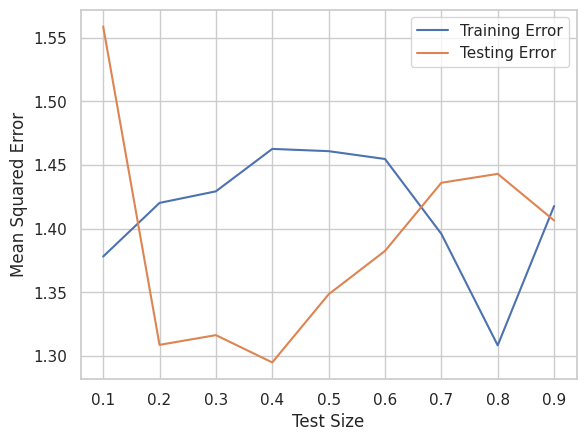

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsQuartEagle.iloc[:,0:2]
y = coinsQuartEagle.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsQuartEagle.iloc[:,0:2]
Y = coinsQuartEagle.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.7, random_state=0)

In [39]:
X

,Year,Mint_State
7925,1797,2
7926,1797,7
7930,1798,2
7931,1798,7
7932,1798,1
...,...,...
8518,1929,1
8519,1929,0
8520,1929,3
8521,1929,4


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

7081055.677558022

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.02190923  0.09524485]
Intercept: 48.07703120113859


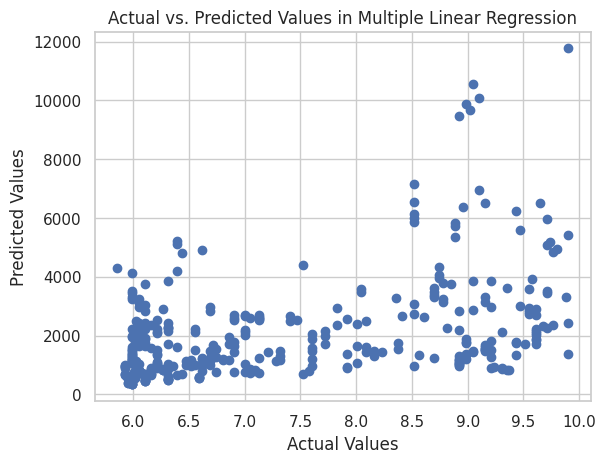

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

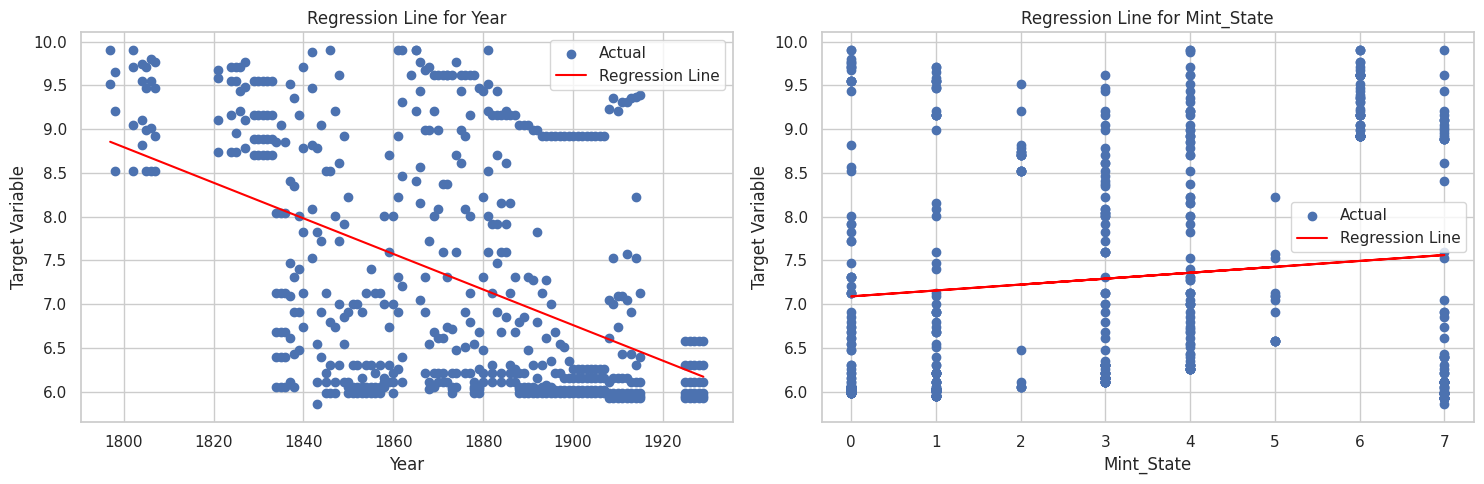

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsQuartEagle[coinsQuartEagle['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
7926,1797,7,20000.0,9.903488
7931,1798,7,10000.0,9.210340
7936,1802,7,8500.0,9.047821
7941,1804,7,9000.0,9.104980
7946,1805,7,8000.0,8.987197
...,...,...,...,...
8493,1925,7,375.0,5.926926
8499,1926,7,375.0,5.926926
8505,1927,7,375.0,5.926926
8511,1928,7,375.0,5.926926


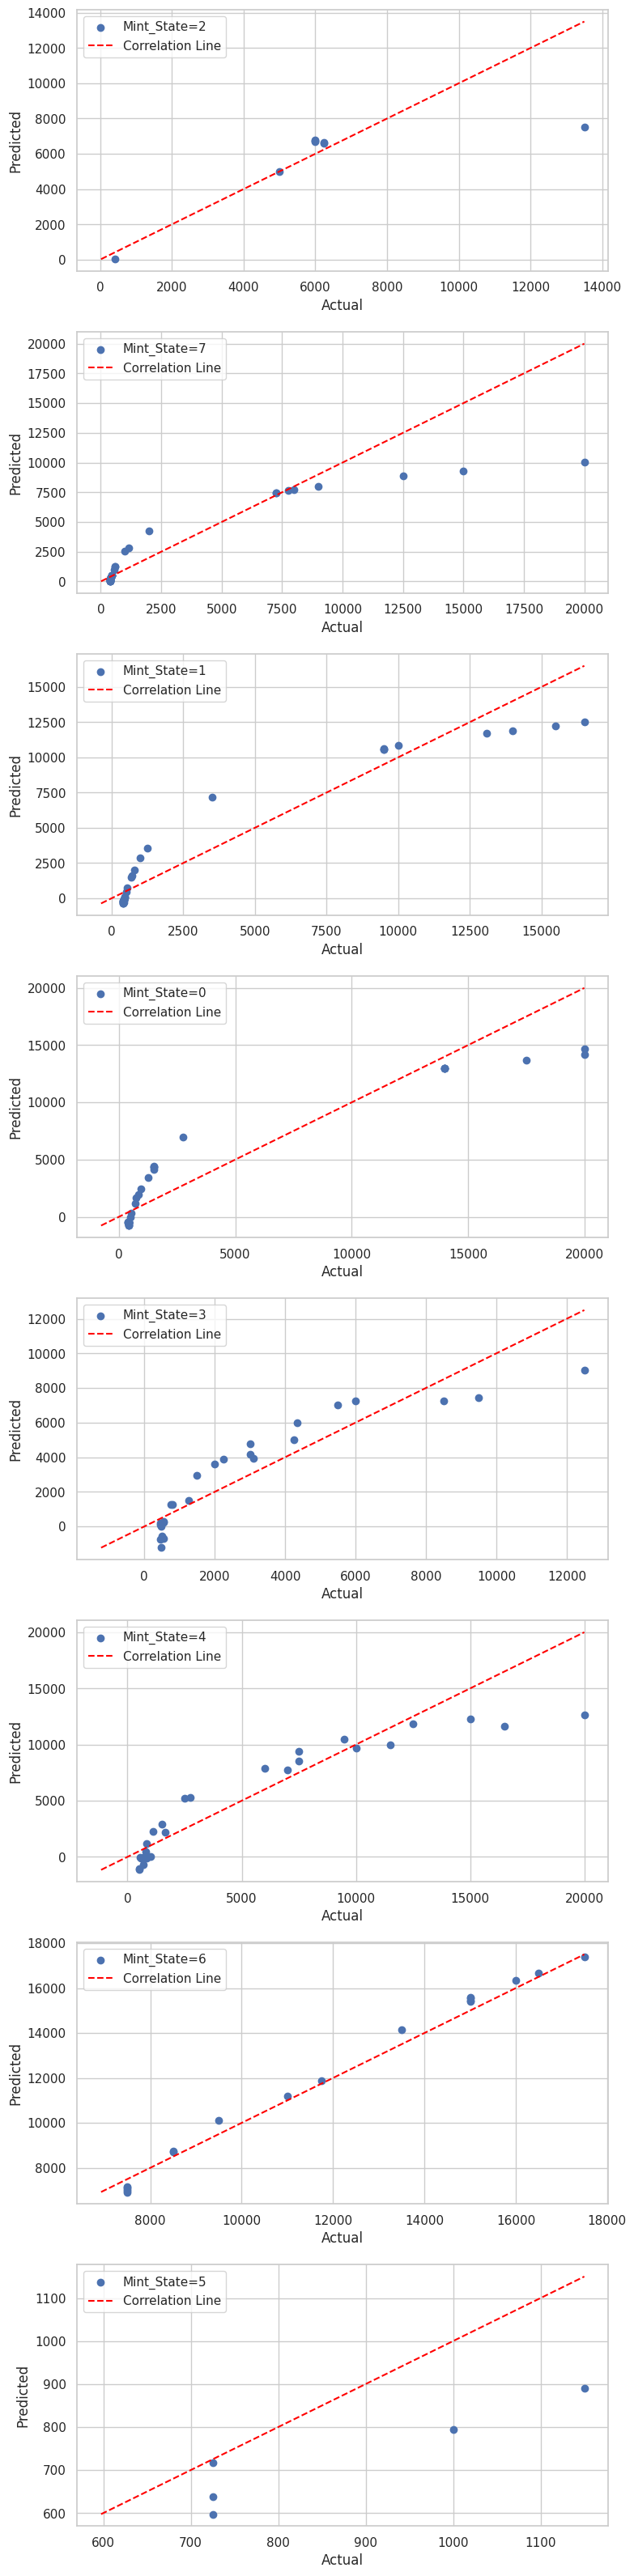

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsQuartEagle.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsQuartEagle['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsQuartEagle[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsQuartEagle[coinsQuartEagle[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

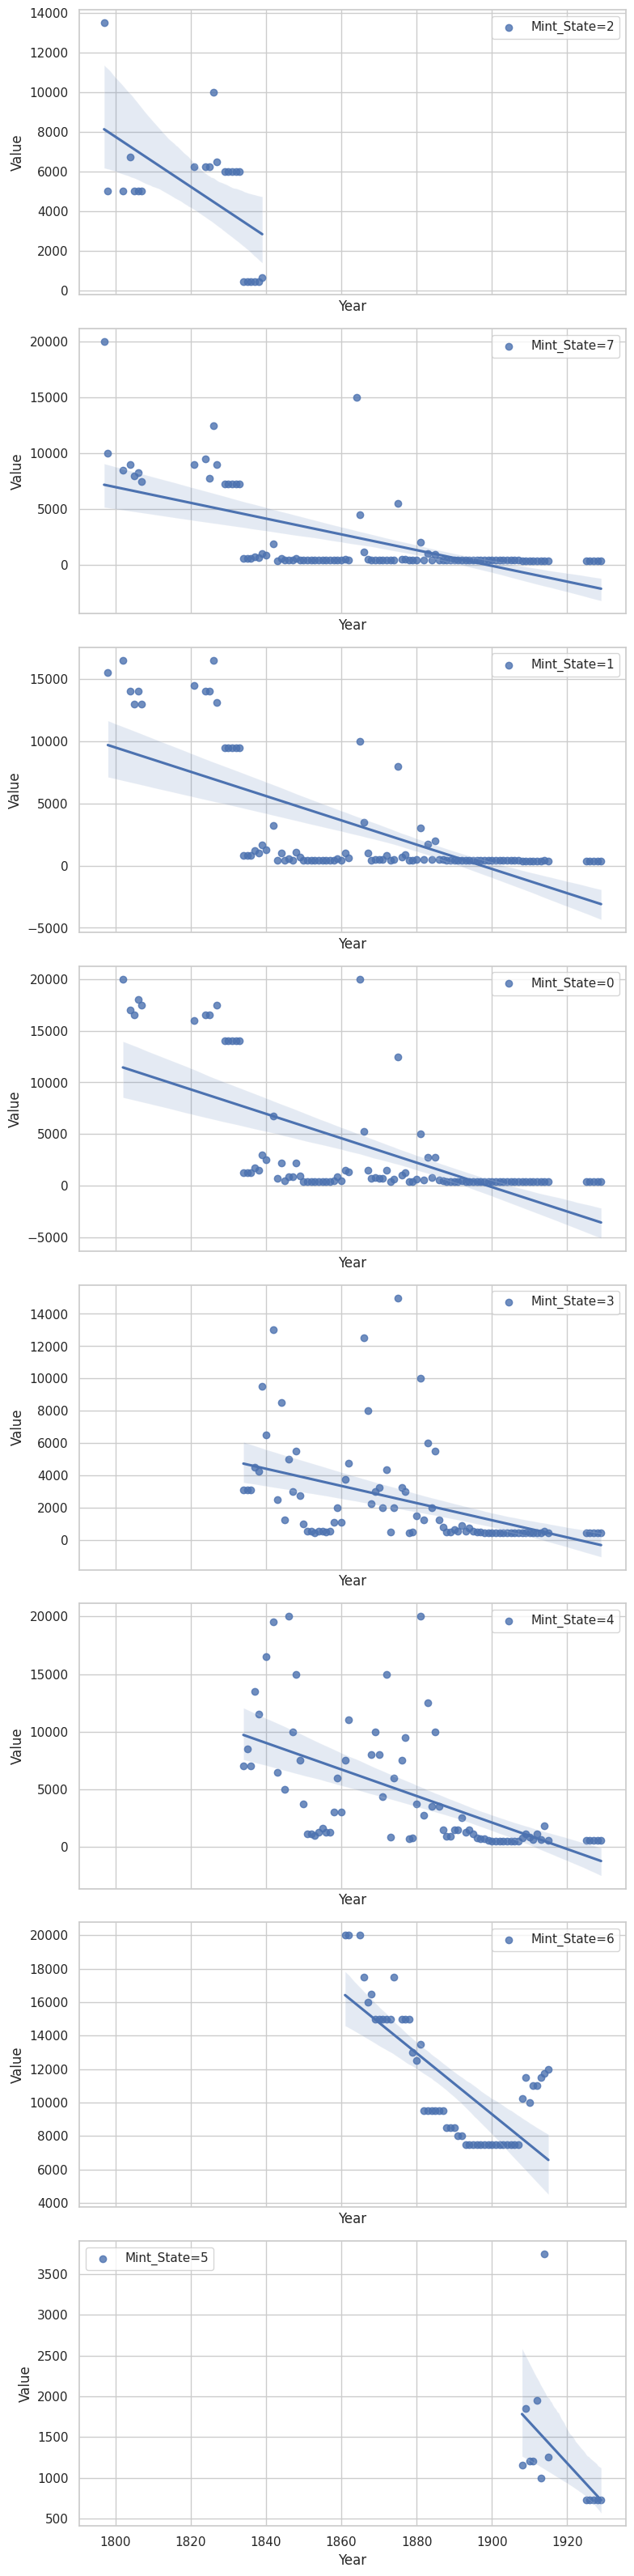

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsQuartEagle[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsQuartEagle[coinsQuartEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.547297  -0.585899
Mint_State       NaN         NaN       NaN        NaN
Value      -0.547297         NaN  1.000000   0.915246
log_Value  -0.585899         NaN  0.915246   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.632753  -0.699108
Mint_State       NaN         NaN       NaN        NaN
Value      -0.632753         NaN  1.000000   0.940040
log_Value  -0.699108         NaN  0.940040   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.681891  -0.726619
Mint_State       NaN         NaN       NaN        NaN
Value      -0.681891         NaN  1.000000   0.950760
log_Value  -0.726619         NaN  0.950760   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.654801  -0.734813
Mint_State       NaN         NaN       NaN        NaN
Value      -0.654801        

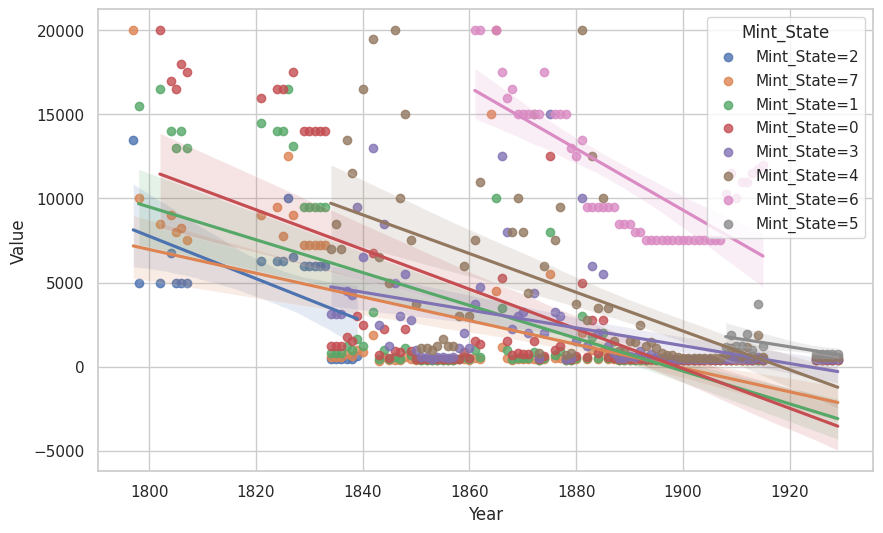

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsQuartEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsQuartEagle[coinsQuartEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsQuartEagle.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.115311,-0.421319,-0.473315
Mint_State,0.115311,1.000000,0.108654,0.124344
Value,-0.421319,0.108654,1.000000,0.918416
log_Value,-0.473315,0.124344,0.918416,1.000000


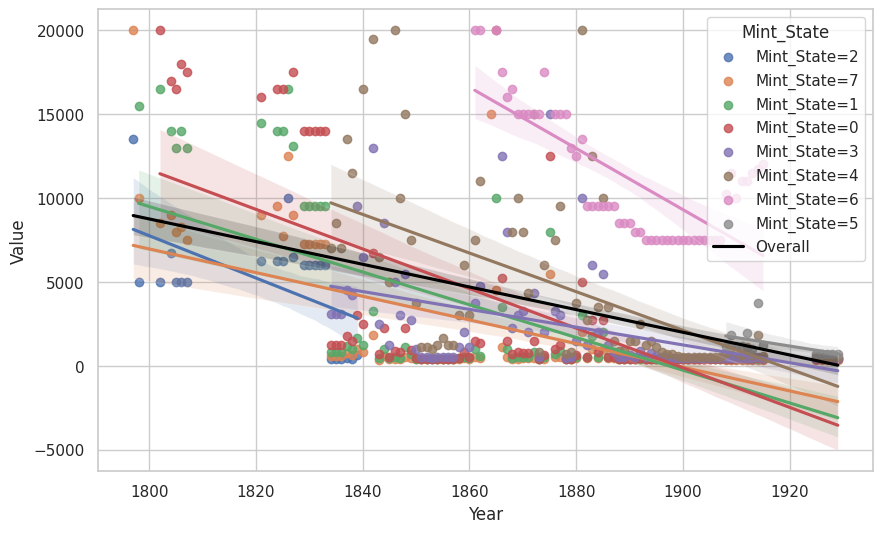

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsQuartEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsQuartEagle[coinsQuartEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsQuartEagle[attribute_column], y=coinsQuartEagle[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

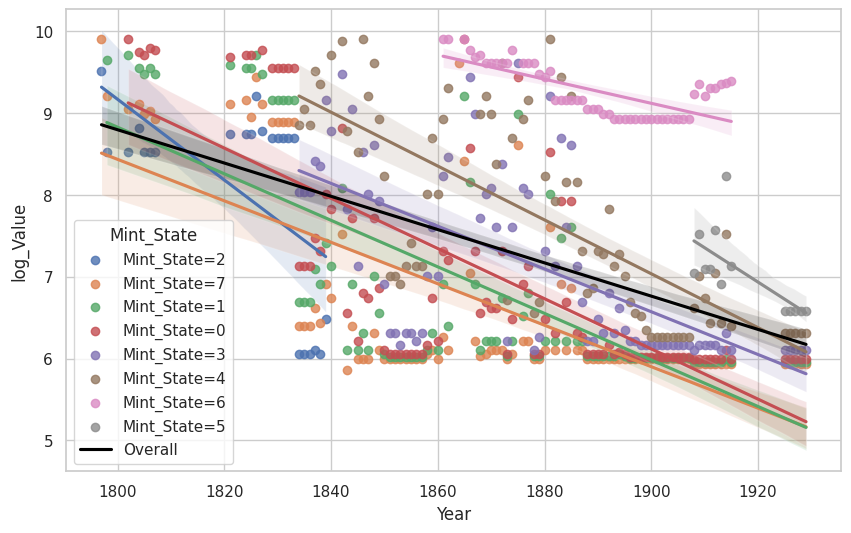

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsQuartEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsQuartEagle[coinsQuartEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsQuartEagle[attribute_column], y=coinsQuartEagle[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()